# **Section C: Practical Application (15 marks)**


Instructions: In this section, you will be provided with a new dataset in hive. Use your knowledge of Big Data Analytics to answer the following questions.

Dataset: Social Media Engagement Data

`User_ID	Post_Likes	Post_Shares	Comment_Count	Follower_Count`

`1	120	30	15	5000`

`2	80	20	10	3000`

`3	150	40	25	8000`

`4	100	15	20	2000`

`5	200	50	30	6000`

...	...	...	...	...


1. Perform `exploratory data analysis` on the provided dataset. Identify key patterns related to social media engagement.
2. Apply a `regression model` to predict the number of post likes based on post shares, comment count, and follower count. Evaluate the model's performance.
3. `Cluster` the users based on their social media engagement data. Provide insights into different user segments and their engagement behaviors.

In [ ]:
# !pip install findspark

In [ ]:
# !pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=ae7072df4c0a2c4eec3d9d349fc4f92d73d97130aae93e96d8176e51df92e857
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# !pip install VectorAssembler

ERROR: Could not find a version that satisfies the requirement VectorAssembler (from versions: none)
ERROR: No matching distribution found for VectorAssembler


In [ ]:
# !pip install LinearRegression

In [ ]:
# !pip install ClusteringEvaluator

ERROR: Could not find a version that satisfies the requirement ClusteringEvaluator (from versions: none)
ERROR: No matching distribution found for ClusteringEvaluator


In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Asad_11355").enableHiveSupport().getOrCreate()

In [ ]:
data = [
    (1, 120, 30, 15, 5000),
    (2, 80, 20, 10, 3000),
    (3, 150, 40, 25, 8000),
    (4, 100, 15, 20, 2000),
    (5, 200, 50, 30, 6000)
]

columns = ["User_ID", "Post_Likes", "Post_Shares", "Comment_Count", "Follower_Count"]

df = spark.createDataFrame(data, columns)

# **1. Exploratory Data Analysis**

In [ ]:
df.printSchema()

root
 |-- User_ID: long (nullable = true)
 |-- Post_Likes: long (nullable = true)
 |-- Post_Shares: long (nullable = true)
 |-- Comment_Count: long (nullable = true)
 |-- Follower_Count: long (nullable = true)



# **Data Analysis**

In [ ]:
df.describe().show()

+-------+------------------+----------------+------------------+-----------------+------------------+
|summary|           User_ID|      Post_Likes|       Post_Shares|    Comment_Count|    Follower_Count|
+-------+------------------+----------------+------------------+-----------------+------------------+
|  count|                 5|               5|                 5|                5|                 5|
|   mean|               3.0|           130.0|              31.0|             20.0|            4800.0|
| stddev|1.5811388300841898|46.9041575982343|14.317821063276353|7.905694150420948|2387.4672772626645|
|    min|                 1|              80|                15|               10|              2000|
|    max|                 5|             200|                50|               30|              8000|
+-------+------------------+----------------+------------------+-----------------+------------------+



In [ ]:
df.count()

5

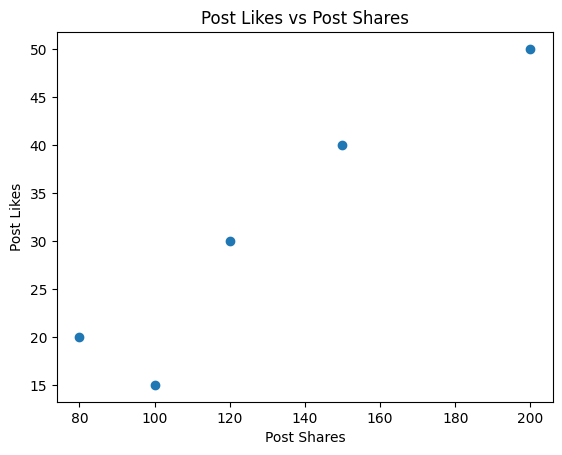

In [ ]:
import matplotlib.pyplot as plt

plt.scatter("Post_Likes", "Post_Shares", data=df.toPandas())
plt.title('Post Likes vs Post Shares')
plt.xlabel('Post Shares')
plt.ylabel('Post Likes')
plt.show()

# **2. Linear Regression**

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Post_Shares", "Comment_Count", "Follower_Count"], outputCol="features")
transformed_assembler = assembler.transform(df)

In [ ]:
train_data, test_data = transformed_assembler.randomSplit([0.8, 0.2], seed=42)

In [ ]:
from pyspark.ml.regression import LinearRegression

linear_regression = LinearRegression(featuresCol="features", labelCol="Post_Likes")
linear_regression_model = linear_regression.fit(train_data)

In [ ]:
predictions = linear_regression_model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="Post_Likes", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 981.7777777778389


# **3. K-Mean Clustering**

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["Post_Shares", "Comment_Count", "Follower_Count"], outputCol="features")
transformed_assembler = assembler.transform(df)

In [ ]:
from pyspark.ml.clustering import KMeans

k_mean_clustering = KMeans(featuresCol="features", k=2)
k_mean_clustering_model = k_mean_clustering.fit(transformed_assembler)

In [ ]:
predictions = k_mean_clustering_model.transform(transformed_assembler)

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score for Clustering: {silhouette}")

Silhouette Score for Clustering: 0.7378931348597801


# **Stats**

In [ ]:
from pyspark.ml.stat import Correlation

corr_matrix = Correlation.corr(transformed_assembler, "features").head()
print("Correlation matrix:\n", str(corr_matrix[0]))

Correlation matrix:
 DenseMatrix([[1.        , 0.77302068, 0.84836675],
             [0.77302068, 1.        , 0.59603956],
             [0.84836675, 0.59603956, 1.        ]])


In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import Window

# **Mean**

In [ ]:
mean_likes = df.agg(F.mean("Post_Likes").alias("Mean_Likes")).collect()[0]["Mean_Likes"]
print(f"Mean Likes: {mean_likes}")

Mean Likes: 130.0


# **Median**

In [ ]:
median_likes = df.approxQuantile("Post_Likes", [0.5], 0.01)[0]
print(f"Median Likes: {median_likes}")

Median Likes: 120.0


# **Mode**

In [ ]:
mode_likes = df.groupBy("Post_Likes").count().orderBy(F.desc("count")).select("Post_Likes").first()["Post_Likes"]
print(f"Mode Likes: {mode_likes}")

Mode Likes: 120
